In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import json
import zipfile

In [7]:
%matplotlib inline

In [9]:
path = 'E:/test/names/'

In [11]:
open(path + 'yob2015.txt','r').readlines()[:5]


['Emma,F,20455\n',
 'Olivia,F,19691\n',
 'Sophia,F,17417\n',
 'Ava,F,16378\n',
 'Isabella,F,15617\n']

In [12]:
names2015 = pd.read_csv(path + 'yob2015.txt', names = ['Name', 'Sex', 'Babies'])

In [13]:
names2015.head()

,Name,Sex,Babies
0,Emma,F,20455
1,Olivia,F,19691
2,Sophia,F,17417
3,Ava,F,16378
4,Isabella,F,15617


In [26]:
all_years = []
for year in range(1880,2015+1):
    all_years.append(pd.read_csv(path + 'yob{}.txt'.format(year),
                                 names = ['Name', 'Sex', 'Babies']))
    all_years[-1]['Year'] = year  # 每个dataframe添加一个year列

In [27]:
type(all_years),type(all_years[0]),len(all_years),all_years[0].shape

(list, pandas.core.frame.DataFrame, 136, (2000, 4))

In [28]:
all_names = pd.concat(all_years)

In [29]:
all_names.shape

(1859413, 4)

In [30]:
all_names.head()

,Name,Sex,Babies,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [31]:
# grouping data
group_name = all_names.groupby(['Sex','Year'])

In [32]:
group_name.head()

,Name,Sex,Babies,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
942,John,M,9655,1880
943,William,M,9532,1880
944,James,M,5927,1880
945,Charles,M,5348,1880
946,George,M,5126,1880


In [37]:
group_name.size()

Sex  Year
F    1880      942
     1881      938
     1882     1028
     1883     1054
     1884     1172
     1885     1197
     1886     1282
     1887     1306
     1888     1474
     1889     1479
     1890     1534
     1891     1533
     1892     1661
     1893     1652
     1894     1702
     1895     1808
     1896     1825
     1897     1799
     1898     1975
     1899     1842
     1900     2224
     1901     1943
     1902     2042
     1903     2083
     1904     2165
     1905     2234
     1906     2220
     1907     2399
     1908     2434
     1909     2548
             ...  
M    1986     7826
     1987     8150
     1988     8489
     1989     9228
     1990     9484
     1991     9647
     1992     9816
     1993    10169
     1994    10245
     1995    10327
     1996    10532
     1997    10811
     1998    11303
     1999    11609
     2000    12117
     2001    12301
     2002    12482
     2003    12754
     2004    13220
     2005    13366
     2006    14035
  

In [38]:
group_name.size().unstack()

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Sex,,,,,,,,,,,,,,,,,,,,,
F,942,938,1028,1054,1172,1197,1282,1306,1474,1479,...,20053,20568,20464,20183,19815,19563,19509,19241,19191,19091
M,1058,997,1099,1030,1125,1097,1110,1067,1177,1111,...,14035,14393,14615,14526,14258,14345,14238,14041,14052,14030


In [39]:
names2015.groupby(['Sex']).sum()

,Babies
Sex,
F,1780453
M,1911537


In [41]:
all_names.head()

,Name,Sex,Babies,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [40]:
# pivot table are useful for summarizing data

In [42]:
pd.pivot_table(all_names,'Babies','Name','Year')


Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Name,,,,,,,,,,,,,,,,,,,,,
Aaban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,6.0,9.0,11.0,11.0,14.0,16.0,15.0
Aabha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,5.0,NaN,9.0,7.0
Aabid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aabriella,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0
Aada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
Aadam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,8.0,6.0,9.0,7.0,17.0,11.0,16.0,19.0,22.0
Aadan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,22.0,23.0,11.0,11.0,11.0,13.0,8.0,10.0
Aadarsh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,13.0,16.0,NaN,7.0,12.0,12.0,18.0,15.0
Aaden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.0,157.0,957.0,636.0,450.0,275.0,224.0,204.0,239.0,297.0


In [43]:
pd.pivot_table(all_names,'Babies',['Name','Year'])

Babies
Name      Year        
Aaban     2007     5.0
          2009     6.0
          2010     9.0
          2011    11.0
          2012    11.0
          2013    14.0
          2014    16.0
          2015    15.0
Aabha     2011     7.0
          2012     5.0
          2014     9.0
          2015     7.0
Aabid     2003     5.0
Aabriella 2008     5.0
          2014     5.0
          2015     5.0
Aada      2015     5.0
Aadam     1987     5.0
          1988     5.0
          1993     7.0
          1994     6.0
          1995     6.0
          1996     5.0
          1997     5.0
          1998     8.0
          1999     5.0
          2000     6.0
          2002    11.0
          2003    10.0
          2004     9.0
...                ...
Zyshawn   2011     5.0
          2012    10.0
          2013    13.0
          2014     6.0
Zyshon    1998     8.0
          2001     6.0
          2005     5.0
Zyshonne  1998    26.0
          1999    30.0
          2000    17.0
          2001    12.0
          2002     9.0
          2003     7.0
Zytaevius 2012     5.0
Zytaveon  2011     9.0
          2014     8.0
Zytavion  2011     5.0
Zytavious 2002     6.0
          2004     6.0
          2005     5.0
          2006     7.0
          2007     6.0
          2009     7.0
          2010     6.0
Zyus      2015     5.0
Zyvion    2009     5.0
Zyvon     2015     7.0
Zyyanna   2010     6.0
Zyyon     2014     6.0
Zzyzx     2010     5.0

[1696160 rows x 1 columns]

In [44]:
pd.pivot_table(all_names,'Babies',['Name','Year'],'Year')

Year            1880  1881  1882  1883  1884  1885  1886  1887  1888  1889  \
Name      Year                                                               
Aaban     2007   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2009   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2010   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2011   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2012   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2013   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2014   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2015   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabha     2011   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2012   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2014   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2015   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabid     2003   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabriella 2008   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2014   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2015   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aada      2015   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aadam     1987   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          1988   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          1993   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          1994   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          1995   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          1996   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          1997   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          1998   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          1999   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2002   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2003   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2004   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Zyshawn   2011   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2012   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2013   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2014   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zyshon    1998   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2001   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2005   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zyshonne  1998   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          1999   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2001   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2002   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2003   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zytaevius 2012   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zytaveon  2011   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2014   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zytavion  2011   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zytavious 2002   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
          2004   NaN  

In [49]:
# Visualize Data

In [50]:
all_names_index = all_names.set_index(['Sex','Name','Year']).sort_index()

In [58]:
all_names_index.head(10)

Babies
Sex Name      Year        
F   Aabha     2011       7
              2012       5
              2014       9
              2015       7
    Aabriella 2008       5
              2014       5
              2015       5
    Aada      2015       5
    Aaden     2009       5
    Aadhira   2012       6

In [57]:
def name_plt(sex,name):
    data = all_names_index.loc[sex,name]
    plt.plot(data.index,data.values)

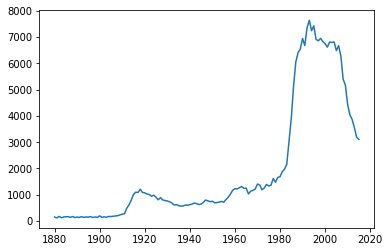

In [61]:
name_plt('M','Alex')

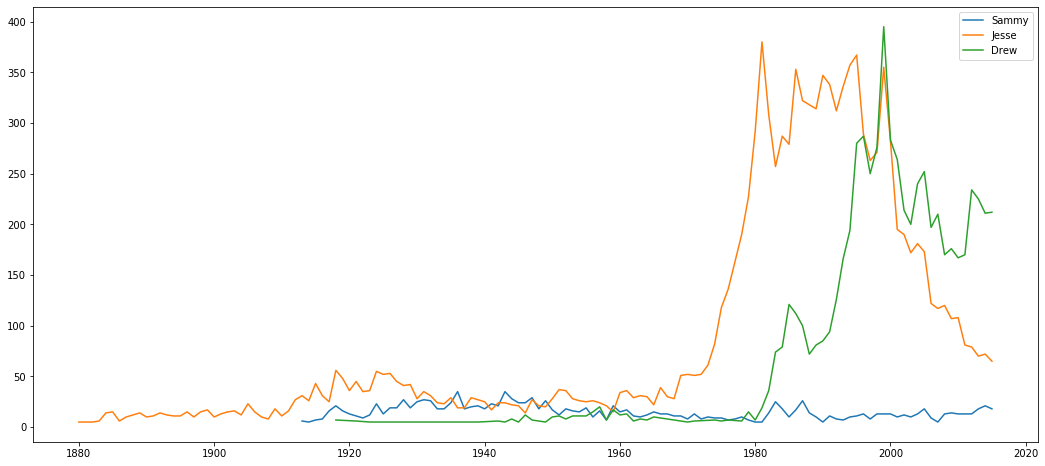

In [65]:
plt.figure(figsize=(18,8))
names = ['Sammy','Jesse','Drew']
for name in names:
    name_plt('F',name)
plt.legend(names)